## Ford Gobike Data Exploration

This document explores the dataset containing the trip data of the fordgo bike.

### Preliminary Wrangling

In [1]:
# importing the packages necessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset into pandas dataframe

df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# overview of the data

df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# numeric varaiables information

df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
182422,737,2019-02-01 08:12:35.4340,2019-02-01 08:24:53.0780,78.0,Folsom St at 9th St,37.773717,-122.411647,24.0,Spear St at Folsom St,37.789677,-122.390428,377,Subscriber,1967.0,Male,No
111968,484,2019-02-12 16:22:34.2330,2019-02-12 16:30:38.8860,297.0,Locust St at Grant St,37.322980,-121.887931,308.0,San Pedro Square,37.336802,-121.894090,3990,Subscriber,1976.0,Female,Yes
143248,1292,2019-02-07 15:44:13.7550,2019-02-07 16:05:46.0350,126.0,Esprit Park,37.761634,-122.390648,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,4778,Subscriber,1979.0,Male,No
34144,1785,2019-02-24 08:27:15.1250,2019-02-24 08:57:01.0790,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,3579,Customer,NaN,NaN,No
113933,543,2019-02-12 10:26:31.3870,2019-02-12 10:35:35.1770,108.0,16th St Mission BART,37.764710,-122.419957,108.0,16th St Mission BART,37.764710,-122.419957,5008,Subscriber,1994.0,Male,No
11994,353,2019-02-27 18:04:22.9720,2019-02-27 18:10:16.0880,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,219.0,Marston Campbell Park,37.809824,-122.280192,765,Subscriber,1991.0,Female,No
134523,683,2019-02-08 17:13:39.2330,2019-02-08 17:25:02.5710,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,104.0,4th St at 16th St,37.767045,-122.390833,5019,Subscriber,1983.0,Male,No
93936,564,2019-02-15 17:06:57.2400,2019-02-15 17:16:21.8890,58.0,Market St at 10th St,37.776619,-122.417385,223.0,16th St Mission BART Station 2,37.764765,-122.420091,5484,Subscriber,1997.0,Female,No
59289,545,2019-02-20 20:36:53.3570,2019-02-20 20:45:58.6370,369.0,Hyde St at Post St,37.787349,-122.416651,86.0,Market St at Dolores St,37.769305,-122.426826,5809,Subscriber,1964.0,Male,No
107432,1039,2019-02-13 16:03:55.8450,2019-02-13 16:21:15.2500,13.0,Commercial St at Montgomery St,37.794231,-122.402923,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5406,Subscriber,1993.0,Female,No


In [8]:
# checking for null values

df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# gender information

df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
# type of user information

df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [11]:
# start station name information

df['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [12]:
# end station name information

df['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [13]:
# checking for duplicates

sum(df.duplicated())

0

- Data has incorrect datatypes in the columns ('start_time', 'end_time', 'start_station_id', 'end_station_id', 'bike_id', 'user_type', 'member_gender', 'member_birth_year')

- Missing values in columns ('start_station_name', 'end_station_name', 'member_birth_year', 'member_gender')

#### Correcting the datatypes

In [14]:
# convert start_time and end_time into datetime 

df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [15]:
# convert start_station_id, end_station_id, and bike_id into strings

df['start_station_id'] = df.start_station_id.astype('str')
df['end_station_id'] = df.end_station_id.astype('str')
df['bike_id'] = df.bike_id.astype('str')

In [16]:
# convert user_type and member_gender into categories

df['user_type'] = df.user_type.astype('category')
df['member_gender'] = df.member_gender.astype('category')

In [17]:
# dropping all null values

df = df.dropna()

In [18]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [19]:
# convert member_birth_year type to int

df['member_birth_year'] = df.member_birth_year.astype(int)

In [20]:
# getting the member ages from member_birth_year column and changing it to int

df['member_age'] = 2021 - df['member_birth_year']
df['member_age'] = df['member_age'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [22]:
df['member_age'].mean()

36.196865425945404

In [23]:
# adding new columns 'start_date', start_hour', 'trip_duration_min', 'week_day', 'month'

df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour'] = df.start_time.dt.strftime('%H')
df['trip_duration_min'] = df['duration_sec']/60
df['week_day'] = df.start_time.dt.strftime('%A')
df['month'] = df.start_time.dt.strftime('%B')

In [24]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_date,start_hour,trip_duration_min,week_day,month
122641,407,2019-02-11 11:09:23.760,2019-02-11 11:16:11.391,16.0,Steuart St at Market St,37.794130,-122.394430,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Subscriber,1988,Male,No,33,2019-02-11,11,6.783333,Monday,February
1703,329,2019-02-28 18:50:23.916,2019-02-28 18:55:52.947,116.0,Mississippi St at 17th St,37.764802,-122.394771,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,...,Subscriber,1978,Male,No,43,2019-02-28,18,5.483333,Thursday,February
103069,185,2019-02-14 14:52:12.477,2019-02-14 14:55:17.913,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,23.0,The Embarcadero at Steuart St,37.791464,...,Subscriber,1994,Male,No,27,2019-02-14,14,3.083333,Thursday,February
69145,488,2019-02-19 20:06:28.888,2019-02-19 20:14:37.089,114.0,Rhode Island St at 17th St,37.764478,-122.402570,107.0,17th St at Dolores St,37.763015,...,Subscriber,1983,Male,No,38,2019-02-19,20,8.133333,Tuesday,February
69370,183,2019-02-19 19:44:26.817,2019-02-19 19:47:30.537,90.0,Townsend St at 7th St,37.771058,-122.402717,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,Subscriber,1976,Male,No,45,2019-02-19,19,3.050000,Tuesday,February


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [26]:
df.to_csv("201902-fordgobike-tripdata-clean.csv", index = False)

###  Structure of the dataset?

The dataset contains 174952 rows and 17 columns for Ford GoBike System, which covers the greater San Francisco Bay area. 
The dataset contains:
- trip duration
- start/end time for bike rides
- start date for bike rides
- start/end station names
- customer data 


###  Feature(s) of interest in the dataset
- duration_sec
- trip_duration_min

### Features that support the investigation
- member_birth_year
- member_age
- member_gender
- bike_share_for_all_trip
- start_day
- user_type

### Univariate Exploration
Investigating distributions of individual variables

#### Trip duration in seconds

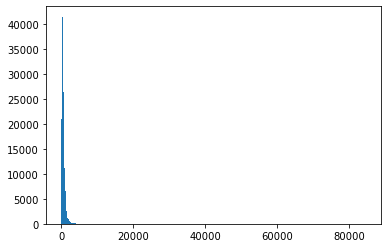

In [27]:
plt.hist(data = df, x = 'duration_sec', bins = 500);

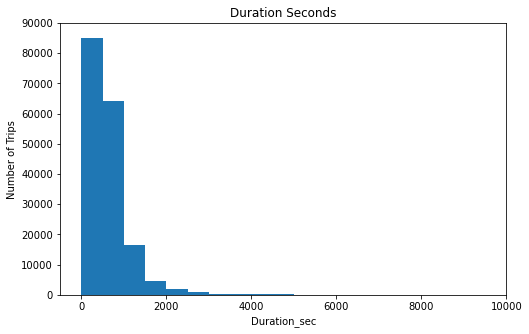

In [28]:
bins = np.arange(0, df['duration_sec'].max()+500, 500)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Duration Seconds')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()


#### Observation:
From the above plot we can observe that most of the values fall below 2000 seconds, but we dont know where the peak lies. So lets further explore.

<ipython-input-29-786cc1f99556>:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000])


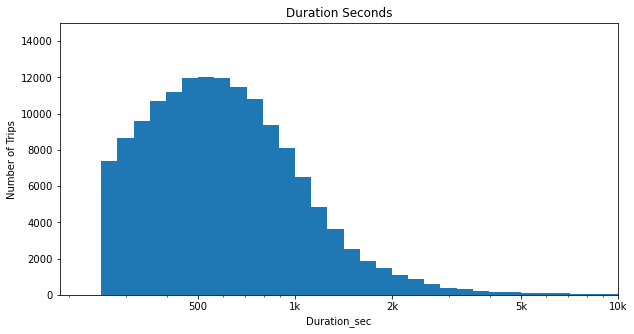

In [29]:

log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+0.05, 0.05)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Duration Seconds')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

#### Observation:
From the above plot, it can be said that most of the values fall below 2000 seconds with the peak between 500-600 seconds.

#### Trip duration in minutes

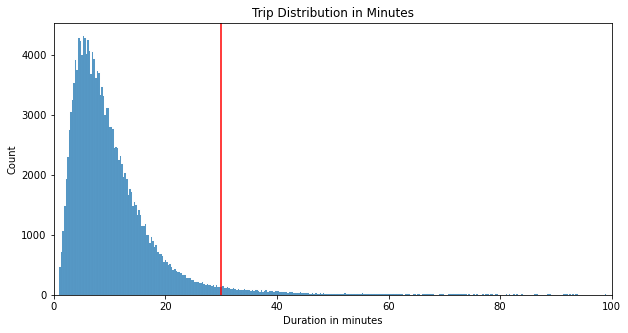

In [30]:
# distribution by trip_duration_min

plt.figure(figsize = (10, 5))

sns.histplot(data = df, x = "trip_duration_min")
plt.xlim(0, 100)
plt.title("Trip Distribution in Minutes")
plt.xlabel('Duration in minutes')
plt.ylabel('Count')
plt.axvline(x=30, color = "red")
plt.show()

In [31]:
len(df[df['trip_duration_min'] <= 30]) / len(df['trip_duration_min']) * 100

96.5607709543189

In [32]:
len(df[df['trip_duration_min'] > 60]) / len(df['trip_duration_min']) * 100

0.7922172938863232

#### Observation:
From the above plot, it can be said that 96% of trips were less than 30 minutes and 0.79% of trips were more than an hour, which can be considered as outliers and should be removed for further analysis

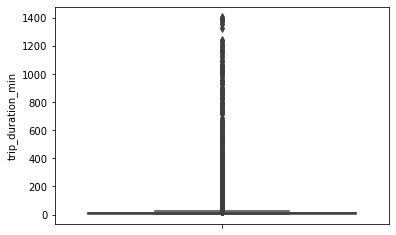

In [33]:
# Outlier

sns.boxplot(data = df, y = 'trip_duration_min');

In [34]:
# removing the outlier

df = df[df["trip_duration_min"] <= 60]

In [35]:
df.trip_duration_min.describe()

count    173566.000000
mean         10.308359
std           7.396235
min           1.016667
25%           5.350000
50%           8.450000
75%          13.000000
max          59.933333
Name: trip_duration_min, dtype: float64

#### Bike usage by hour

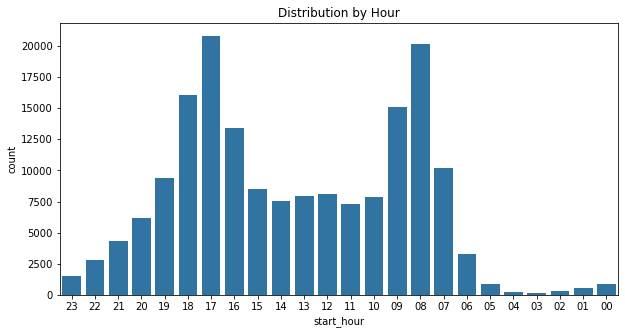

In [36]:
# distribution by start_hour

plt.figure(figsize = (10,5))

base_color = sns.color_palette()[0]

sns.countplot(data = df, x = 'start_hour', color = base_color)
plt.title("Distribution by Hour")

plt.show()

#### Observation:
As we can see the x axis of the plot is not in ordered sequence of numbers, so lets make it in order to analyse busy hours to know demand of bike trips

In [37]:
df['start_hour'] = df['start_time'].dt.hour

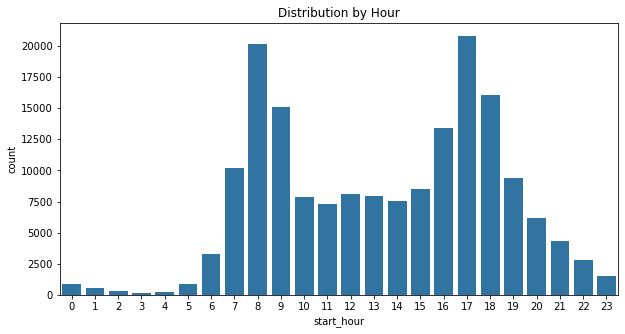

In [38]:
plt.figure(figsize = (10,5))

base_color = sns.color_palette()[0]

sns.countplot(data = df, x = 'start_hour', color = base_color)
plt.title("Distribution by Hour")

plt.show()

#### Observation:
From the plot, it can be said that the peak hours are from 7am - 9am and 16 - 18 i.e 4pm - 6pm. This indicates that demand of bike trips are more during the peak hours.

#### Bike usage by weekday

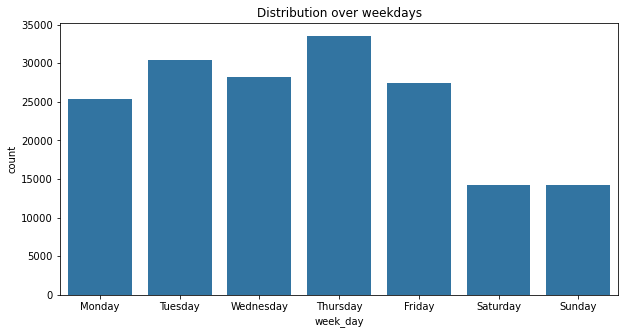

In [39]:
# distribution over week_day

plt.figure(figsize = (10,5))

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

week_day_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)

df['week_day'] = df['week_day'].astype(week_day_categ)

sns.countplot(data=df, x='week_day', color=base_color)

plt.title('Distribution over weekdays')

plt.show()

#### Observation:
From the plot, it an be said that the trips gradually increse from Monday and reaches the highest peak on Thursday and then, it declines reaching its lowest on saturday and Sunday.

#### Usage by members age

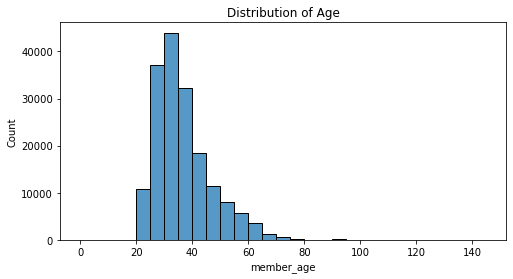

In [40]:
# distribution of member_age

plt.figure(figsize = (8,4))

bins = np.arange(0, df['member_age'].max()+5, 5)
sns.histplot(data=df, x='member_age', color=base_color, bins = bins)

plt.title("Distribution of Age")

plt.show()

#### Observation:
From the plot, it can be said that the distribution of age is right skewed. Members with ages between 30-40 take the most rides.

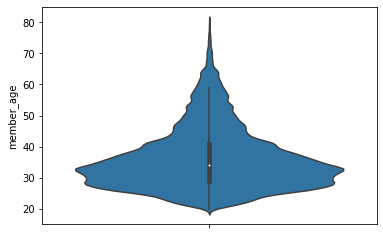

In [68]:
sns.violinplot(data = df, y = 'member_age');

#### Observation:
From the plot, it can be said that the members with ages between 30-40 take the most rides.

In [69]:
len(df[df['member_age'] <= 40]) / len(df['member_age']) * 100

74.01810074814118

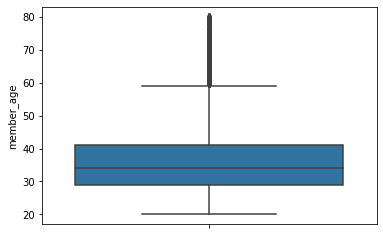

In [70]:
# Outlier

sns.boxplot(data = df, y = 'member_age');

#### Observation:
From the above boxplot we can see there are outliers that needs to be removed for further analysis. 

In [71]:
# removing the outlier

df = df[df["member_age"] <= 80]

In [72]:
df.member_age.describe()

count    173363.000000
mean         36.116478
std           9.867429
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max          80.000000
Name: member_age, dtype: float64

#### What is the distribution of user type?

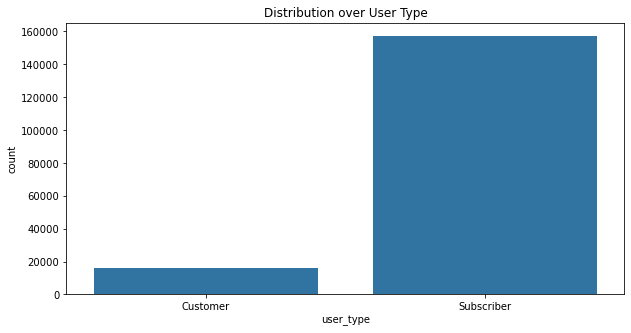

In [94]:
# distribution over user_type

plt.figure(figsize = (10,5))

counts = df['user_type'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plot = sns.countplot(data=df, x='user_type', color=base_color)

plt.title("Distribution over User Type")

plt.show()

#### Observation:
From the plot it can be said that, subscribers represent 90% and are the majority bike riders rather than the customers who represent only 9%.

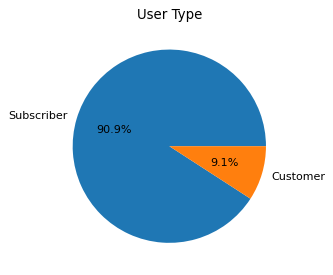

In [82]:
user_type=df['user_type'].value_counts()
plt.figure(figsize=(4,4), dpi= 80, facecolor='w', edgecolor='k')
plt.pie(user_type,labels=user_type.index,autopct= '%1.1f%%')
plt.title('User Type');

#### Observation:
From the plot it is further confimed that, subscribers represent 90% and are the majority bike riders rather than the customers who represent only 9%.

#### What is the distribution of gender?

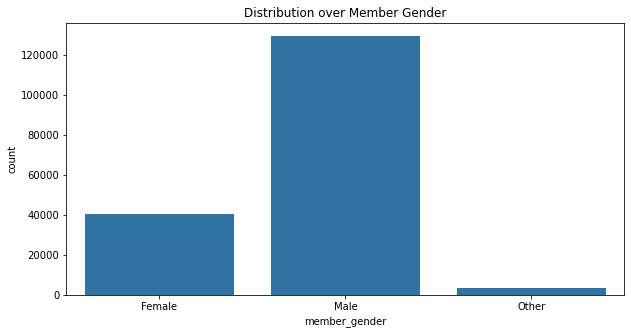

In [83]:
# distribution over member_gender

plt.figure(figsize = (10,5))

counts = df['member_gender'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plot = sns.countplot(data=df, x='member_gender', color=base_color)

plt.title("Distribution over Member Gender")

plt.show()

#### Observation:
From the plot it can be said that, members of the male gender are the majority bike riders representing 75% while, female and other represent only 23% and 2% respectively.

#### What is the popular start station?

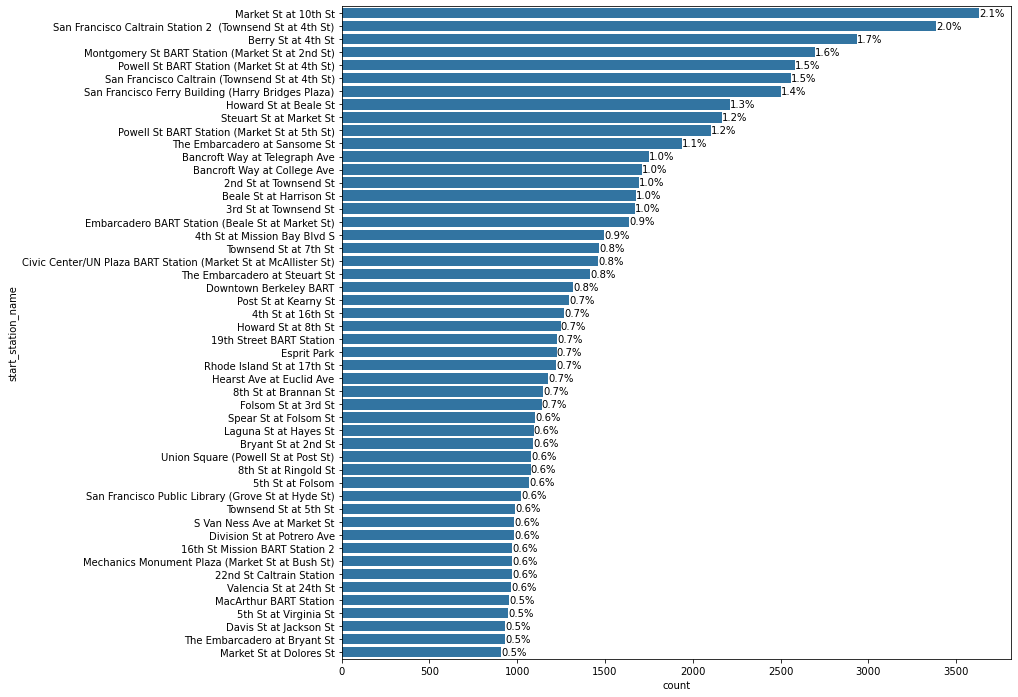

In [74]:
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
c = sns.color_palette()[0]
o = df.start_station_name.value_counts().head(50).index
sns.countplot(data=df , y='start_station_name' , color=c , order=o);

# Putting percentage  
start_counts = df.start_station_name.value_counts().head(50)
for i in range(start_counts.shape[0]):
  count = start_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
  plt.text(count+1, i, pct_string, va = 'center');

#### Observation:
From the above plot we can see that the most popular start station are from Market St and SanFrancisco caltrian St

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- Most of the values fall below 2000 seconds with the peak between 500-600 seconds in the duration_sec column
- It can be noticed that 96% of trips were less than 30 minutes and 0.79% of trips were more than an hour, which can be considered as outliers and were removed for further analysis
- It was noticed that the peak hours were from 7am - 9am and 16 - 18 i.e 4pm - 6pm. This can be considered as the people riding to and fro from home to office and students riding from home to school and vice-versa.
- The trips gradually increse from Monday and reaches the highest peak on Thursday and then, it declines reaching its lowest on saturday and Sunday being the holidays, we can undersatnd its decline
-  The distribution of age is right skewed. Members with ages between 30-40 take the most rides
- we can notice from the distribution over user_type that subscribers represent 90% and are the majority bike riders compared to customers who represent only 9%
- It is also noticed that, members of the male gender are the majority bike riders representing 75% while, female and other represent only 23% and 2% respectively

### Unusual Distributions
- From the time variable additional columns were added ('start_date', start_hour', 'trip_duration_min', 'week_day', 'month')
- 96% of trips duration were less than 30 minutes and only 0.79% of trips more than an hour. Considering this as the outlier, werer removed for further analysis
- Distribution of age was right skewed. Members with ages between 30-40 took the most rides. The memeber_age column also had outliers and were removed.

### Bivariate Exploration
Investigation of relationship between two varaibles

#### What is the relationship between members age and the trips taken by the members?

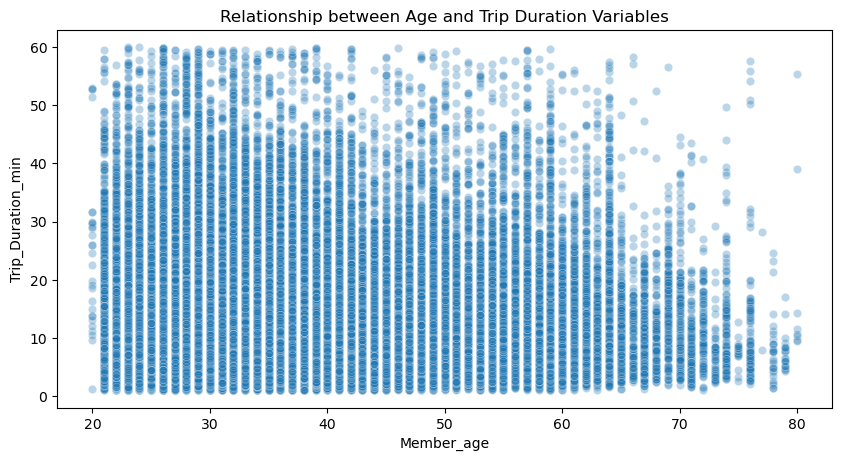

In [47]:
# Relationship between age and trip duration in minutes

plt.figure(figsize = (10,5), dpi = 100)

sns.scatterplot(data = df, x = 'member_age', y = 'trip_duration_min', alpha = 0.3)
plt.xlabel('Member_age')
plt.ylabel('Trip_Duration_min')
plt.title('Relationship between Age and Trip Duration Variables')
plt.show()

#### Observation:
From the plot it can be said that, there's negative relationship between age and trip duration.

#### What is the relationship between members age and their gender?

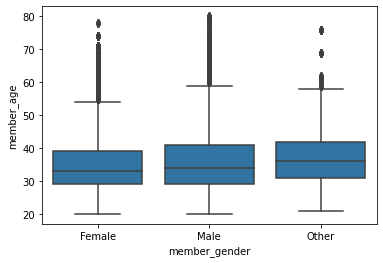

In [48]:
# Relationship between member_age and member_gender

sns.boxplot(data = df, x = 'member_gender', y = 'member_age', color = base_color);

#### Observation:
There's not much of a difference bewteen the age of male and female bike riders.

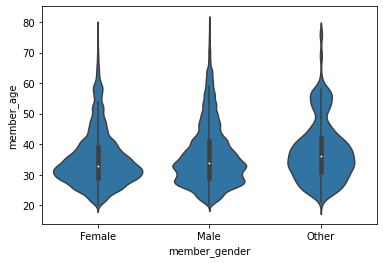

In [75]:
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='member_gender', y='member_age', color=base_color, innner=None);

#### Observation:
From the plot it can be said that, average age of male and female are almost same i.e 33yrs of age

#### Realtion between member gender and trip duration

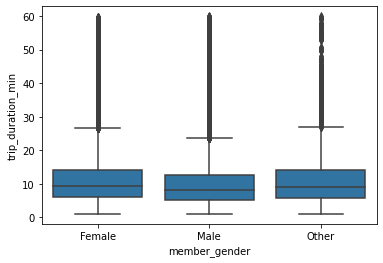

In [50]:
# Relationship between member_gender and trip_duration_min

sns.boxplot(data = df, x = 'member_gender', y = 'trip_duration_min', color = base_color);

#### Observation:
It is observed from the plot that, irrespective of the gender, the trip duration are shorter i.e below 20 mins

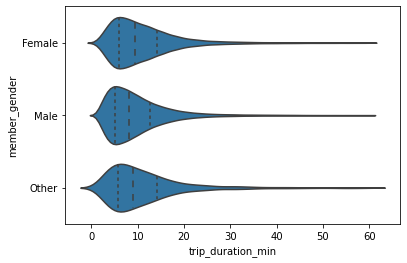

In [76]:
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='trip_duration_min', y='member_gender', color=base_color, inner='quartile');


#### Observation:
From the plot it can be said that, male riders have shorter trips than female and other gender types. Since the difference is not much, significance is not given.

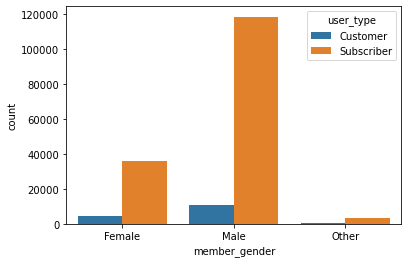

In [77]:
# Relation between member_gender and user_type

sns.countplot(data = df, x = 'member_gender', hue = 'user_type');

#### Observation:
From the plot it can be said that, 75% males are the subscribers to the service which is more compared to female and other types who constitute onlt 23% & 2% respectively. Since 75% of riders are males, it is obvious that male subscribers are high to the service.

#### What is the difference in trip duration between the user types?

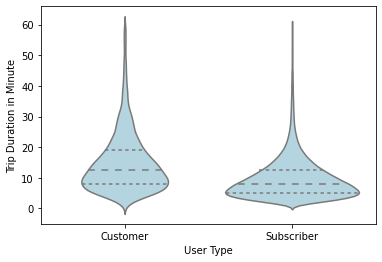

In [79]:
sns.violinplot(data=df, x='user_type', y='trip_duration_min', color = 'lightblue', inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

#### Observation:
On the shorter trip end, the trip duration distribution for subscribers is significantly smaller than customers. While compared to customers who vary more and usually rent the bikes for longer periods of time, it appears that subscribers have a more precise usage or intended purpose when using the bikes.

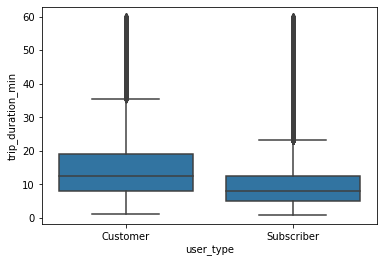

In [53]:
# Relation between user_type and trip_duration_min

sns.boxplot(data = df, x = 'user_type', y = 'trip_duration_min', color = base_color);

#### Observation:
From the plot it can be said that, subscribers have shorter rides compared to customers.

#### What is the bike usage by user types?

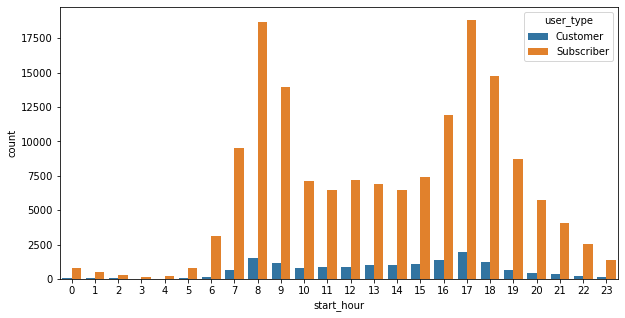

In [54]:
# Relation between start_hour and user_type
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'start_hour', hue = 'user_type');

#### Observation:
It is noticed that the peak hours are from 7am - 9am and 16 - 18 i.e 4pm - 6pm. This can be considered as the subscribers riding to and fro from home to office and students riding from home to school and vice-versa

#### Average trip duration on weekdays

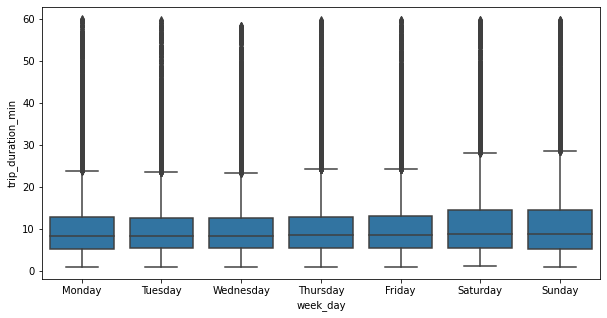

In [55]:
# Relationship between week_day and trip_duration_min

plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'week_day', y = 'trip_duration_min', color = base_color);

#### Observation:
We can see that the trip duration is longer during the weekends and from Monday to Friday the trip duration is steady.

#### Utilization of bike service by user types on weekdays

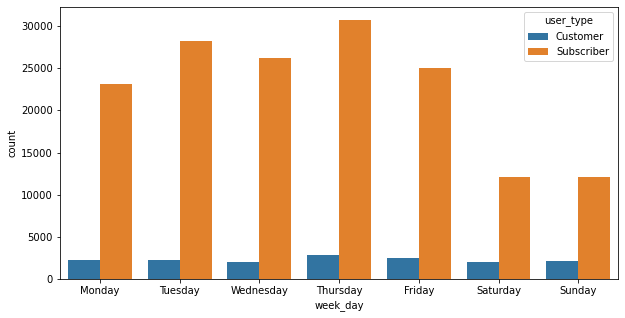

In [56]:
# Relationship between user_type and week_day

plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'week_day', hue = 'user_type');

#### Observation:
Subscribers utilization of service is consistent over the week days and declines on weekends. This might be because subscribers are mostly employees and students.

In [86]:

all_numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age', 'trip_duration_min']
numeric_vars = ['trip_duration_min', 'member_age']
categoric_vars = ['week_day', 'start_hour', 'member_gender', 'user_type']

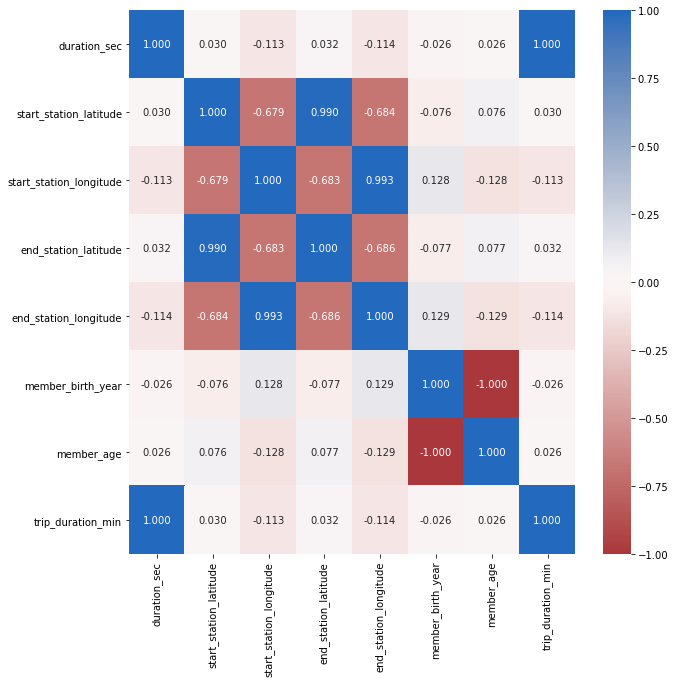

In [87]:
# correlation plot

plt.figure(figsize = [10, 10])
sns.heatmap(df[all_numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

#### Observation:
The correlation cofficients indicate there might be correlations between the following pairs of variables: (start_station_id, end_station_id), (start_station_latitude, start_station_longitude), and (end_station_latitude, end_station_longitude). However, there are no strong evidences to support these.

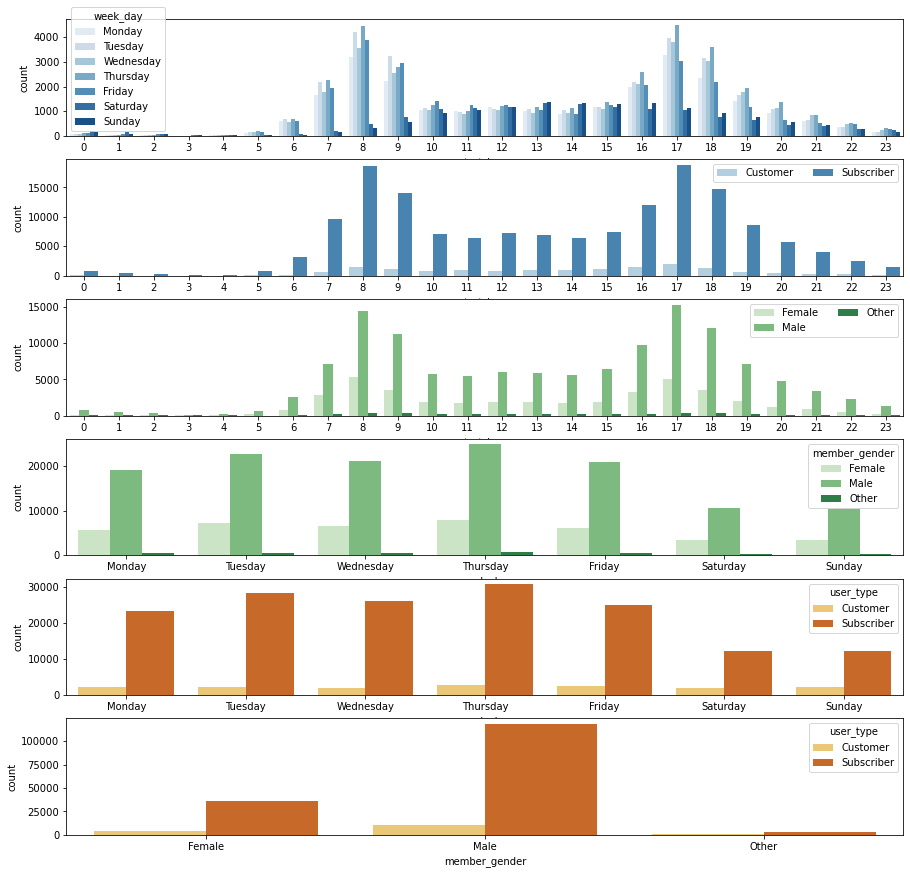

In [59]:
plt.figure(figsize = [15, 15])

# subplot 1: start_hour Vs Week_day
plt.subplot(6, 1, 1)
sns.countplot(data = df, x = 'start_hour', hue = 'week_day', palette = 'Blues')

# subplot 2: start_hour Vs user_type
ax = plt.subplot(6, 1, 2)
sns.countplot(data = df, x = 'start_hour', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: start_hour Vs member_gender
ax = plt.subplot(6, 1, 3)
sns.countplot(data = df, x = 'start_hour', hue = 'member_gender', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 4: Week_day Vs member_gender
ax = plt.subplot(6, 1, 4)
sns.countplot(data = df, x = 'week_day', hue = 'member_gender', palette = 'Greens')

# subplot 5: Week_day Vs user_type
ax = plt.subplot(6, 1, 5)
sns.countplot(data = df, x = 'week_day', hue = 'user_type', palette = 'YlOrBr')

# subplot 6: member_gender Vs user_type
ax = plt.subplot(6, 1, 6)
sns.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'YlOrBr')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- There's negative relationship between age and trip duration
- Average age of male and female are almost same i.e 33yrs of age
- 75% males are the subscribers to the service which is more compared to female and other types who constitute onlt 23% & 2% respectively. Since 75% of riders are males, it is obvious that male subscribers are high to the service
- Subscribers have shorter rides compared to customers
- Subscribers utilization of serveice is consistent over the week days and declines on weekends. This might be because subscribers are mostly employees and students

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I thought there would be positive relationship between member age and the trip duration (i.e older people taking shorter rides), but it was observed that older people took longer rides compared to people of age 30-45

### Multivariate Exploration

In [60]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df['log_duration_min'] = df['trip_duration_min'].apply(log_trans)

In [61]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color');
    bins_x = np.arange(18, df['member_age'].max()+2, 2);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.yticks(log_trans(np.array([5, 10, 20, 50, 100])),
               [5, 10, 20, 50, 100]);

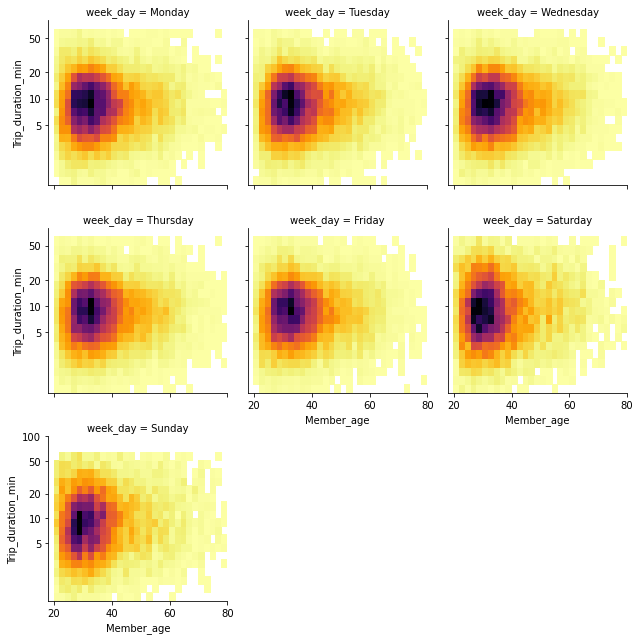

In [62]:
# create faceted heat maps on levels of the week_day variable

week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.FacetGrid(data = df, col = 'week_day', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member_age');
g.set_ylabels('Trip_duration_min');

#### Observation:
From the plot we can say that on weekends the duration of bike rides are longer compared to weekdays.

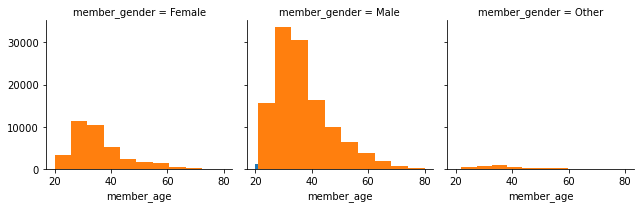

In [63]:
# checking whether subscribers in all the gender type are higher or less

g = sns.FacetGrid(data = df, col = 'member_gender', hue = 'user_type')
g.map(plt.hist, 'member_age');

#### Observation:
From the above plot it can be said that the percentage of subscribers are higher regardless of the gender type.

#### How does the trip duration vary on weekdays between user types?

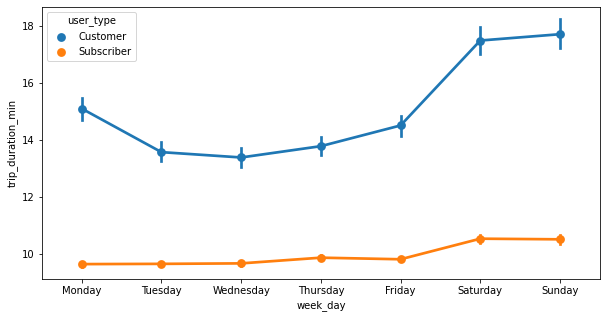

In [64]:
# variation of trip duration on weekdays between subscribers and customers


plt.figure(figsize = (10,5))
sns.pointplot(data = df, x = 'week_day', y = 'trip_duration_min', hue = 'user_type');

#### Observation:
From the plot it can be said that subscribers ride shorter rides compared to customers. In other way, we can also say that customers have longer trips on each day of the week compared to subscribers.

#### How does the trip duration vary over the hours of a day between user types?

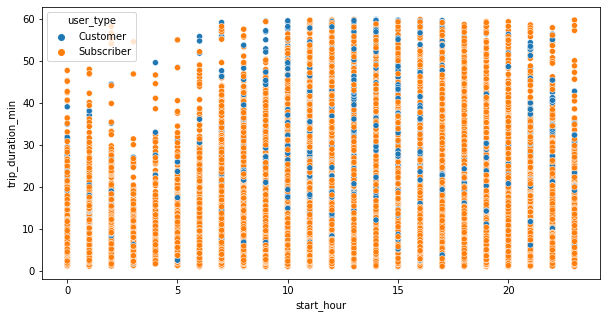

In [65]:
# variation of trip duration over hours in a day between subscribers and customers

plt.figure(figsize = (10,5))
sns.scatterplot(data = df, x = 'start_hour', y = 'trip_duration_min', hue = 'user_type');

#### Observation:
Subscribers ride shorter rides compared to customers and we can also observe from the plot that the customers rides are much longer during mid-days and mid-nights

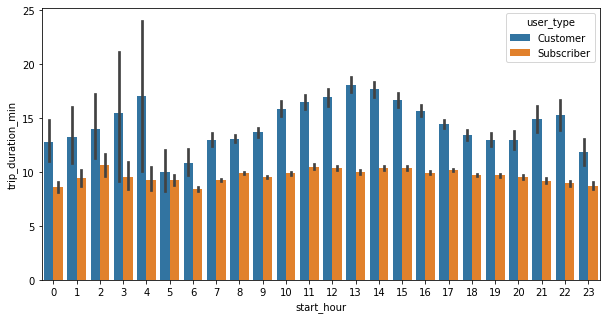

In [66]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = 'start_hour', y = 'trip_duration_min', hue = 'user_type');

#### Observation:
The above plot further confirms that subscribers ride shorter rides compared to customers and we can also observe from the plot that the customers rides are much longer during mid-days and mid-nights

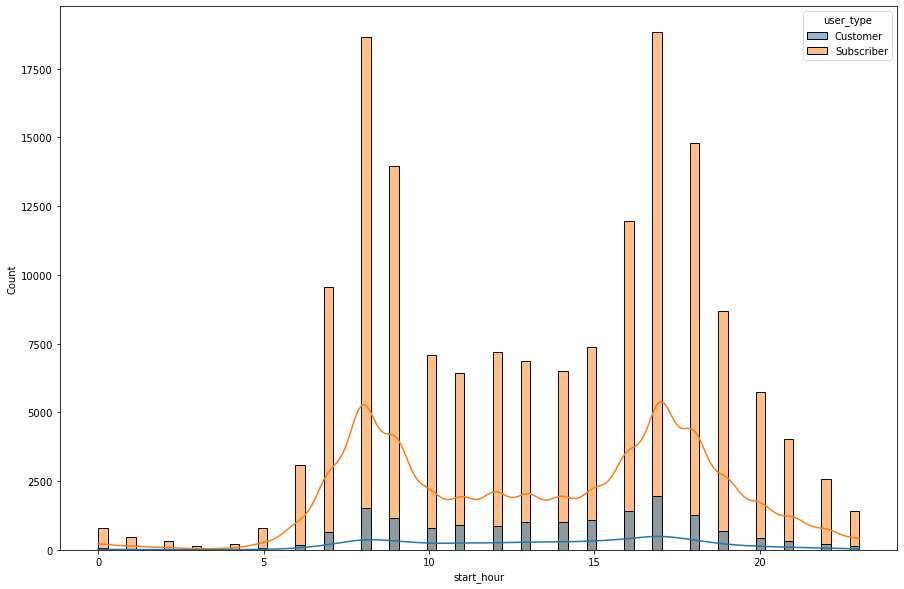

In [67]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=df, x='start_hour', hue='user_type', kde=True)

#### Observation:
From the above plot it is further confirmed that the peak hours are from 7am - 9am and 16 - 18 i.e 4pm - 6pm. This can be considered as the subscribers riding to and fro from home to office and students riding from home to school and vice-versa.

#### How does the hourly usage vary during weekdays between user types?

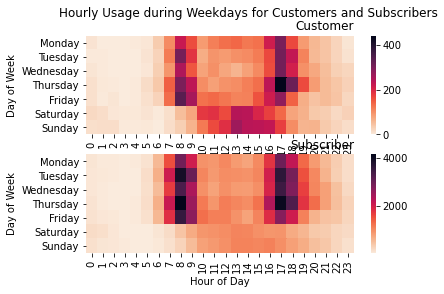

In [100]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['week_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='week_day', columns='start_hour', values='count')
sns.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['week_day', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='week_day', columns='start_hour', values='count')
sns.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

#### Observation:
Subscribers utilization of serveice is consistent over the week days and declines on weekends. The Shorter usage of the bike by the subscribers correlate with peak hours, which shows that the use is primarily for work commute or school commute. The longer rides taken by the customers show heavy use over weekends and afternoons, might be for city tour or leisure.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- On weekends the duration of bike rides are longer compared to weekdays
- Percentage of subscribers are higher regardless of the gender type
- Subscribers ride shorter rides compared to customers. In other way, we can also say that customers have longer trips on each day of the week compared to subscribers
- Customers rides are much longer during mid-days and mid-nights
- Peak hours are from 7am - 9am and 16 - 18 i.e 4pm - 6pm. This can be considered as the subscribers riding to and fro from home to office and students riding from home to school and vice-versa

### Were there any interesting or surprising interactions between features?
- Customers rides are much longer during mid-days and mid-nights
- Customers have longer trips on each day of the week compared to subscribers

#### References
- https://seaborn.pydata.org/tutorial.html
- https://www.w3schools.com/python/matplotlib_plotting.asp
